## Linear Regression Model 


## Problem Statement

In [13]:
# Problem statement:
# 1 To identify value of PetalWidthCm from rest of features

Dependent Var >> PetalWidthCm 
Independent var >> Sepalwidthcm ,petallengthcm ,SepalLengthCm, species

SyntaxError: invalid syntax (1043226339.py, line 1)

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
# Iris Datase
# DataFrame
import pandas as pd
df=pd.read_csv(r'C:\Users\WebTech Lab\Desktop\Data Sets DSS\iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape

(150, 6)

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [12]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### EDA

In [16]:
df['Id'].nunique()

150

In [17]:
df.drop('Id', axis =1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
df.drop('Id', axis =1 ,inplace=True)

In [20]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [23]:
df['SepalLengthCm'].nunique()

35

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

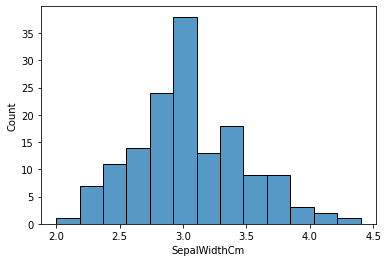

In [24]:
sns.histplot(df['SepalWidthCm'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

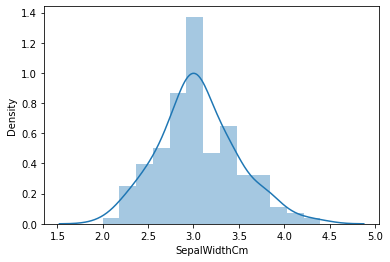

In [25]:
sns.distplot(df['SepalWidthCm'])

In [ ]:
#Perform unique/nunique/distplot/hist plot for all features

In [26]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
df['Species'].nunique()

3

In [29]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

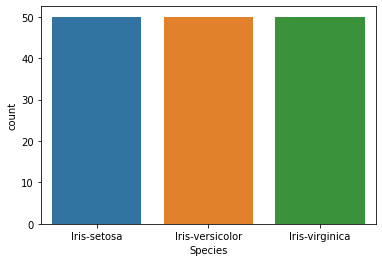

In [30]:
sns.countplot(df['Species'])

<AxesSubplot:>

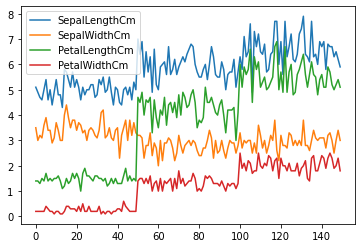

In [31]:
df.plot()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

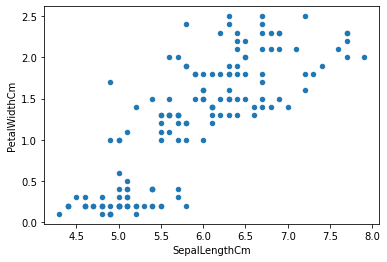

In [32]:
df.plot(x = 'SepalLengthCm', y = 'PetalWidthCm', kind = 'scatter')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

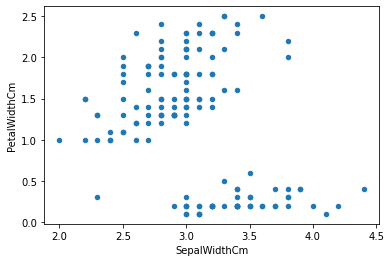

In [33]:
df.plot(x = 'SepalWidthCm', y = 'PetalWidthCm', kind = 'scatter')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

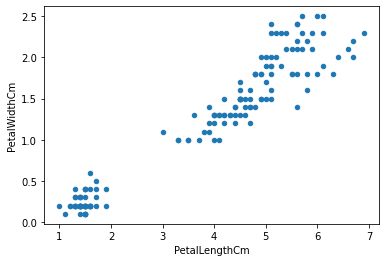

In [34]:
df.plot(x = 'PetalLengthCm', y = 'PetalWidthCm', kind = 'scatter')

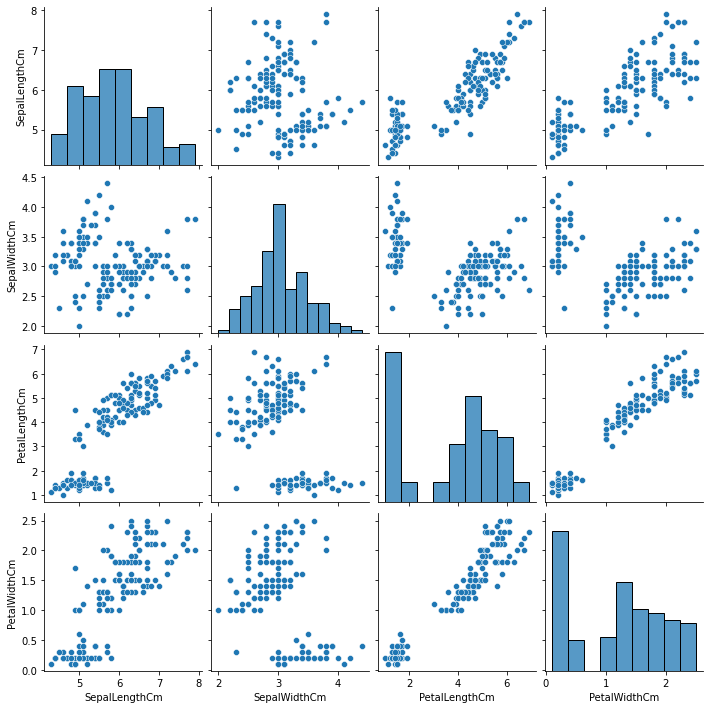

In [35]:
sns.pairplot(df)

In [36]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Feature

In [37]:
# Encoding  >> converting categorical features to numeric
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)


In [38]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [40]:
corr = df.corr()

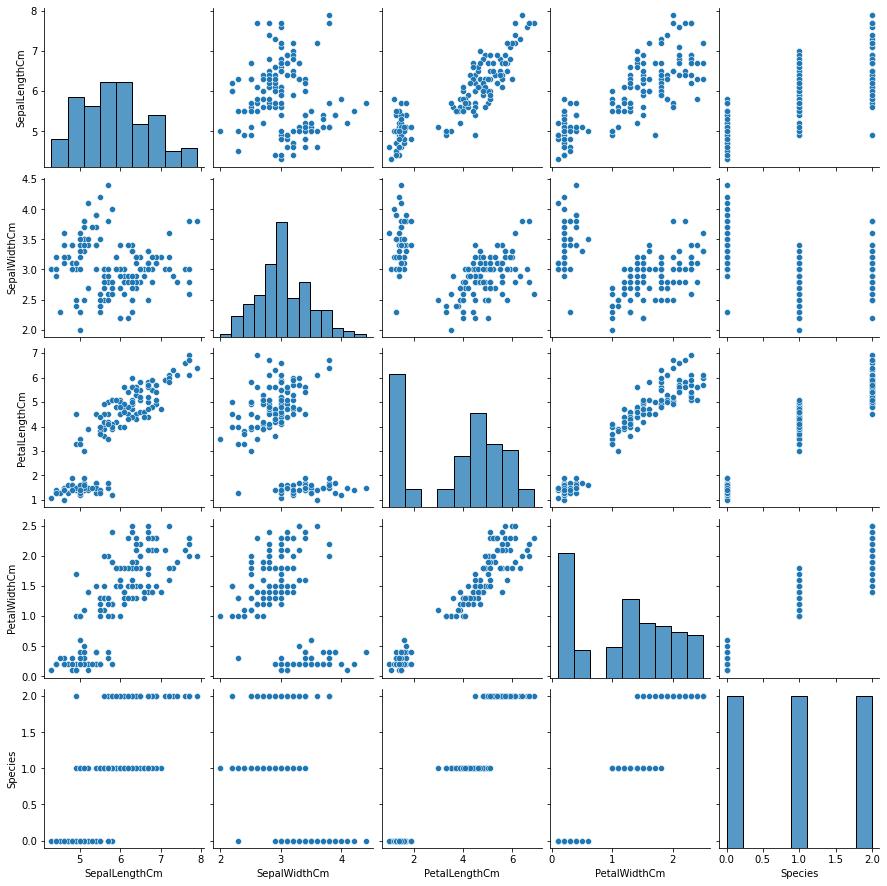

In [41]:
sns.pairplot(df)

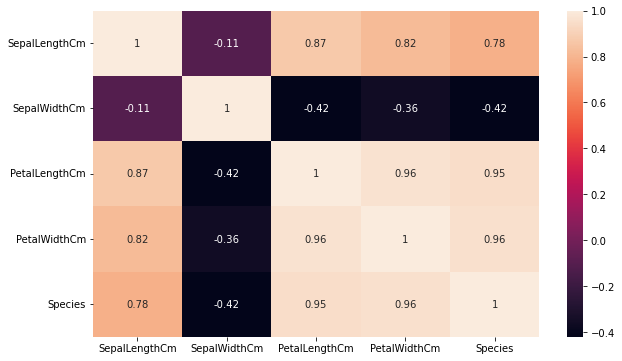

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.savefig('Correlation_Matrix.jpg')

### Model

In [43]:
x = df.drop('PetalWidthCm', axis=1)  # 2D
y = df['PetalWidthCm']  # 1D

##Train Test Split

In [44]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [47]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 126 to 15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  120 non-null    float64
 1   SepalWidthCm   120 non-null    float64
 2   PetalLengthCm  120 non-null    float64
 3   Species        120 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 4.7 KB


# Creating Model

In [48]:
lr_model = LinearRegression()

In [49]:
lr_model.fit(x_train, y_train)    # used to train the model

LinearRegression()

In [50]:
y_pred = lr_model.predict(x_test)

In [51]:
y_pred

array([0.28093637, 0.25073087, 1.8724899 , 0.17638913, 0.41632578,
       2.06078817, 0.21720149, 2.01350036, 2.04553868, 0.17638913,
       0.29635674, 0.23049556, 0.13225289, 0.38944272, 1.48462802,
       1.33709385, 0.03418252, 1.32052417, 2.14659116, 1.19740357,
       1.4821117 , 1.27421336, 2.03326987, 1.29048955, 1.19339618,
       0.29171411, 0.19713707, 1.89937152, 0.46527552, 2.16499365])

In [56]:
y_test


6      0.3
3      0.2
113    2.0
12     0.1
24     0.2
129    1.6
25     0.2
108    1.8
128    2.1
45     0.3
48     0.2
42     0.2
35     0.2
5      0.4
85     1.6
54     1.5
41     0.3
96     1.3
144    2.5
89     1.3
77     1.7
74     1.3
115    2.3
94     1.3
87     1.3
29     0.2
2      0.2
127    1.8
44     0.4
125    1.8
Name: PetalWidthCm, dtype: float64

In [57]:
residual = y_test - y_pred
residual

6      0.019064
3     -0.050731
113    0.127510
12    -0.076389
24    -0.216326
129   -0.460788
25    -0.017201
108   -0.213500
128    0.054461
45     0.123611
48    -0.096357
42    -0.030496
35     0.067747
5      0.010557
85     0.115372
54     0.162906
41     0.265817
96    -0.020524
144    0.353409
89     0.102596
77     0.217888
74     0.025787
115    0.266730
94     0.009510
87     0.106604
29    -0.091714
2      0.002863
127   -0.099372
44    -0.065276
125   -0.364994
Name: PetalWidthCm, dtype: float64

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
mse = mean_squared_error(y_test, y_pred)
print('MSE is :', mse)

MSE is : 0.02986874163612884


In [61]:
rmse = np.sqrt(mse)
print('RMSE is :', rmse)

RMSE is : 0.17282575512963583


In [62]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE is :', mae)

MAE is : 0.12787001795279984


In [63]:
r2_value = r2_score(y_test,y_pred)
r2_value

0.9504609548272962